In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:

dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_new.h5'

In [3]:
NUM_CLASSES = 26

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
print(len(X_dataset))
print(len(y_dataset))

18256
18256


In [7]:
print(y_dataset)
print(X_dataset.shape)

[ 0  0  0 ... 25 25 25]
(18256, 42)


In [8]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=1-train_ratio, random_state=RANDOM_SEED)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 26)                286       
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist=model.fit(X_train,y_train,epochs=500,batch_size=128,validation_data=(X_test, y_test),callbacks=[cp_callback, es_callback])

Epoch 1/500
115/115 [==============================] - 5s 17ms/step - loss: 3.1650 - accuracy: 0.0761 - val_loss: 2.9351 - val_accuracy: 0.1807

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
Epoch 2/500
115/115 [==============================] - 1s 11ms/step - loss: 2.8889 - accuracy: 0.1530 - val_loss: 2.6327 - val_accuracy: 0.2957

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
Epoch 3/500
115/115 [==============================] - 2s 17ms/step - loss: 2.6690 - accuracy: 0.2093 - val_loss: 2.3423 - val_accuracy: 0.3264

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
Epoch 4/500
115/115 [==============================] - 1s 12ms/step - loss: 2.4373 - accuracy: 0.2610 - val_loss: 2.0006 - val_accuracy: 0.4050

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier_new.h5
Epoch 5/500
115/115 [==============================] - 2s 14ms/step - loss: 2.1943 - accurac

CNN Error: 9.50%


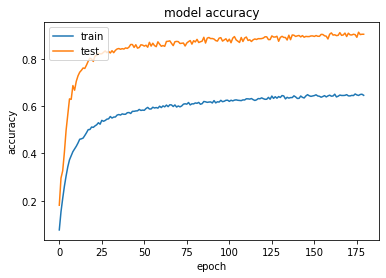

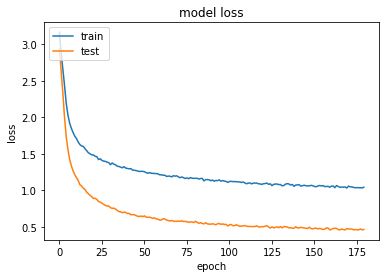

In [14]:
import matplotlib.pyplot as plt
# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))
model.save(model_save_path,include_optimizer=False)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Average prediction time: 0.000090s


Classification Report
---------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       105
           1       0.91      1.00      0.95        99
           2       0.92      0.66      0.77       146
           3       0.73      0.58      0.65       185
           4       0.63      0.95      0.76       168
           5       1.00      0.85      0.92        88
           6       1.00      0.92      0.96        39
           7       0.98      0.75      0.85        73
           8       0.91      1.00      0.95        86
           9       0.96      1.00      0.98        54
          10       0.93      0.93      0.93       123
          11       0.95      0.83      0.89       196
          12       1.00      0.97      0.98       230
          13       0.97      1.00      0.98       143
          14       0.95      0.97      0.96       125
          15       0.99      1.00      0.99     

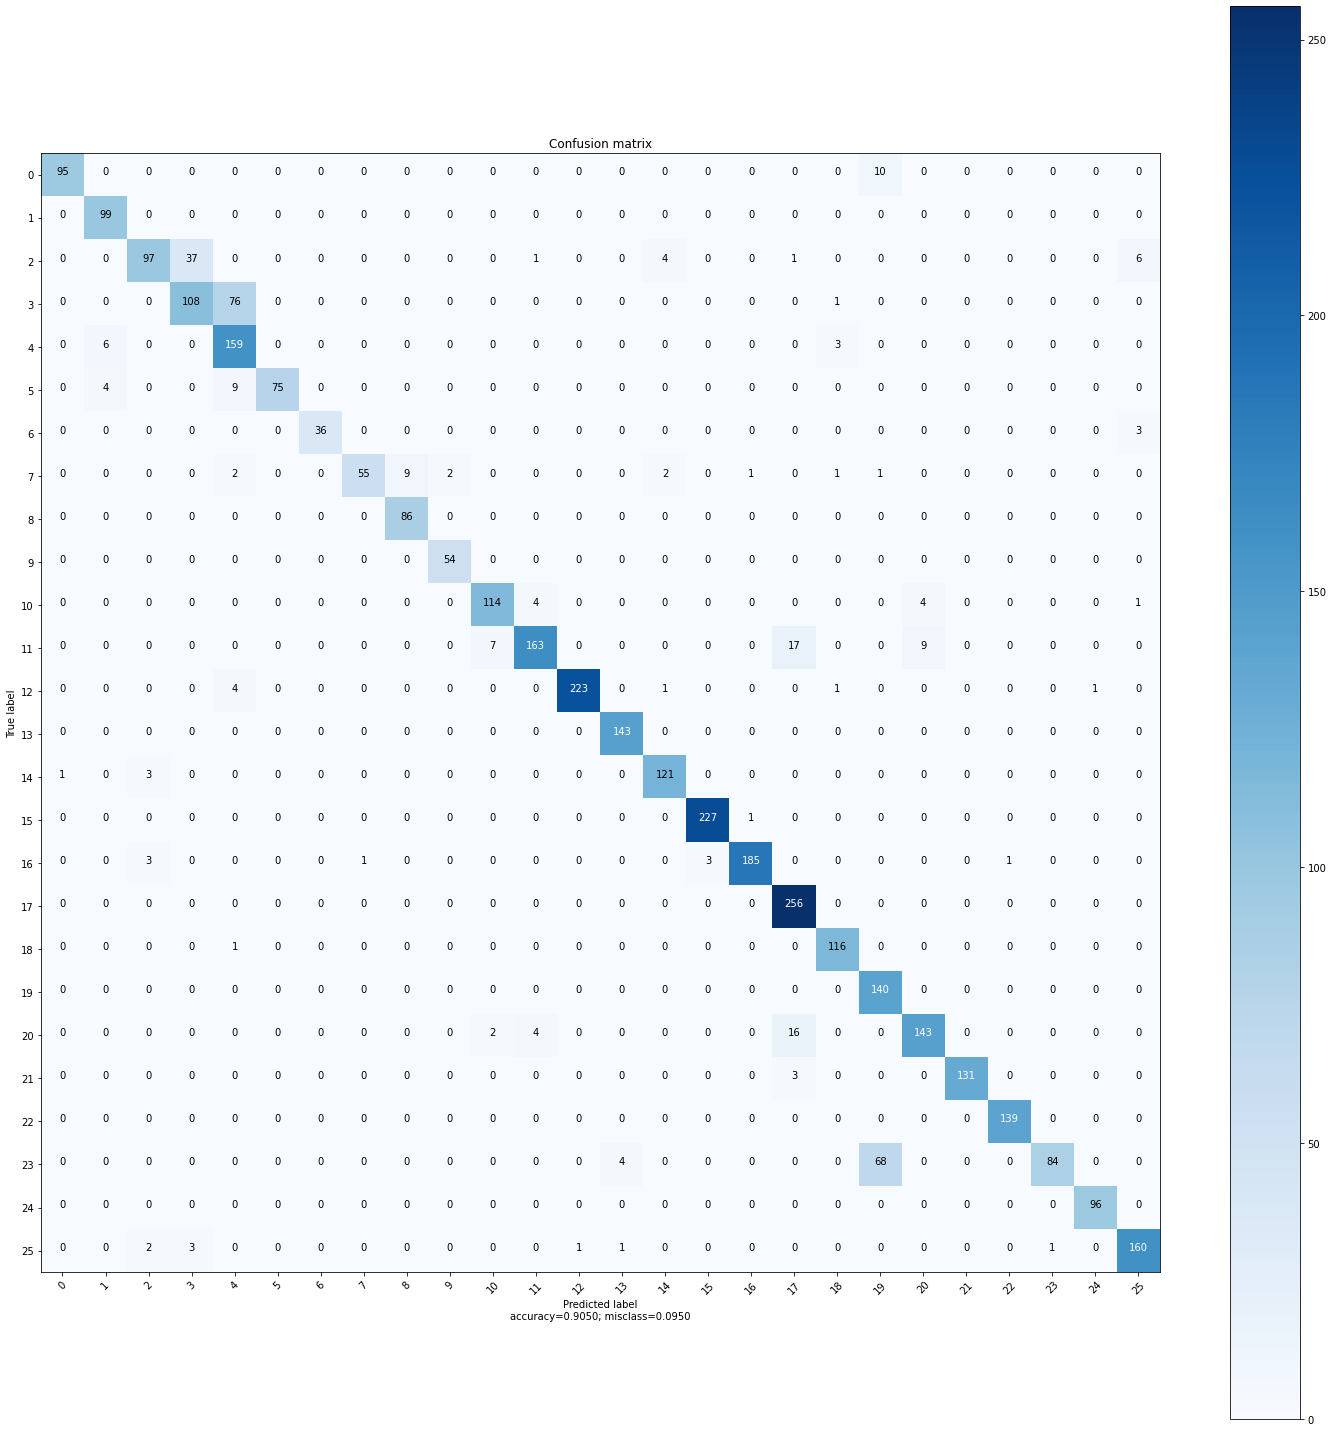

In [15]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('model/keypoint_classifier/confusion_matrix.png')


model = load_model('model/keypoint_classifier/keypoint_classifier_new.h5')
pred_labels=[]
start_time = time.time()
pred_probabs = model.predict(X_test)
end_time = time.time()
pred_time = end_time - start_time
avg_pred_time = pred_time / X_test.shape[0]
print('Average prediction time: %fs' % (avg_pred_time))

for pred_probab in pred_probabs:
    pred_labels.append(list(pred_probab).index(max(pred_probab)))

cm = confusion_matrix(y_test, np.array(pred_labels))

classification_report = classification_report(y_test, np.array(pred_labels))
print('\n\nClassification Report')
print('---------------------------')
print(classification_report)
plot_confusion_matrix(cm, range(26), normalize=False)


In [16]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\bimal\AppData\Local\Temp\tmpl8l5brpf\assets


7312

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
